<a href="https://colab.research.google.com/github/GOPIKAV77/Python/blob/main/AUC_Curve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv("cars.csv")
df.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


Training and Testing data

In [5]:
df["vs"].unique() # unique numbers in dataset

array([0, 1])

In [6]:
df["vs"].value_counts() # counts the number of unique values

,count
vs,
0,18
1,14


In [7]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [8]:
x = df[["mpg","cyl"]]
y = df["vs"].values.reshape(-1,1)

**TRAIN AND TEST DATA**

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)


**MODEL**

In [12]:
r = LogisticRegression()
r.fit(x_train,y_train.ravel())

LogisticRegression()

In [14]:
y_predict_test = r.predict(x_test)
y_predict_test

array([0, 0, 0, 1, 0, 0, 0])

In [15]:
y_predict_train = r.predict(x_train)
y_predict_train

array([1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0])

In [16]:
y_proba_test = r.predict_proba(x_test)
y_proba_test

array([[0.93809378, 0.06190622],
       [0.94376532, 0.05623468],
       [0.63621863, 0.36378137],
       [0.12936392, 0.87063608],
       [0.94598125, 0.05401875],
       [0.96190388, 0.03809612],
       [0.94099339, 0.05900661]])

In [17]:
y_proba_train = r.predict_proba(x_train)
y_proba_train

array([[0.10166134, 0.89833866],
       [0.14234229, 0.85765771],
       [0.94376532, 0.05623468],
       [0.92272509, 0.07727491],
       [0.63028987, 0.36971013],
       [0.0616002 , 0.9383998 ],
       [0.12936392, 0.87063608],
       [0.94466177, 0.05533823],
       [0.0919943 , 0.9080057 ],
       [0.95175545, 0.04824455],
       [0.57118406, 0.42881594],
       [0.14338431, 0.85661569],
       [0.94769445, 0.05230555],
       [0.92570485, 0.07429515],
       [0.07220376, 0.92779624],
       [0.59804067, 0.40195933],
       [0.05462169, 0.94537831],
       [0.60822461, 0.39177539],
       [0.11478728, 0.88521272],
       [0.07220376, 0.92779624],
       [0.56282756, 0.43717244],
       [0.57118406, 0.42881594],
       [0.942395  , 0.057605  ],
       [0.96190388, 0.03809612],
       [0.93349406, 0.06650594]])

**SUMMARY FOR LOGISTIC MODEL**

In [18]:
import statsmodels.api as sm
s1 = sm.add_constant(x)
logit = sm.Logit(y,s1)
result = logit.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.273298
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                   32
Model:                          Logit   Df Residuals:                       29
Method:                           MLE   Df Model:                            2
Date:                Thu, 27 Feb 2025   Pseudo R-squ.:                  0.6012
Time:                        12:45:38   Log-Likelihood:                -8.7455
converged:                       True   LL-Null:                       -21.930
Covariance Type:            nonrobust   LLR p-value:                 1.879e-06
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.9714     11.022      1.449      0.147      -5.632      37.575
mpg           -0.1633      0.

**CONFUSION MATRIX**

In [23]:
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_test,y_predict_test)
acc_score

0.8571428571428571

In [24]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_predict_test)
conf_matrix

array([[5, 0],
       [1, 1]])

In [25]:
true_neg , false_pos , false_neg, true_pos = confusion_matrix(y_test, y_predict_test).ravel()


**CLASSIFICATION REPORT**

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.50      0.67         2

    accuracy                           0.86         7
   macro avg       0.92      0.75      0.79         7
weighted avg       0.88      0.86      0.84         7



From above report we get accuracy, precision, recall , f1-score. Also using below equation we can find accuracy.

**ACCURACY, SPECIFICITY, SENSITIVITY**

In [27]:
accuracy = (true_pos + true_neg)/(true_neg+true_pos+false_neg+false_pos)
accuracy

0.8571428571428571

In [28]:
specificity = true_neg/(true_neg+false_pos)
specificity

1.0

In [29]:
sensitivity = true_pos/(true_pos+false_neg)
sensitivity

0.5

**ROC CURV**E

In [32]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
AUC = roc_auc_score(y_train, y_predict_train)
f1, f2, threshold = roc_curve(y_train, y_proba_train[:,1])
roc_auc1 = auc(f1,f2)

Text(0, 0.5, 'True positive rate')

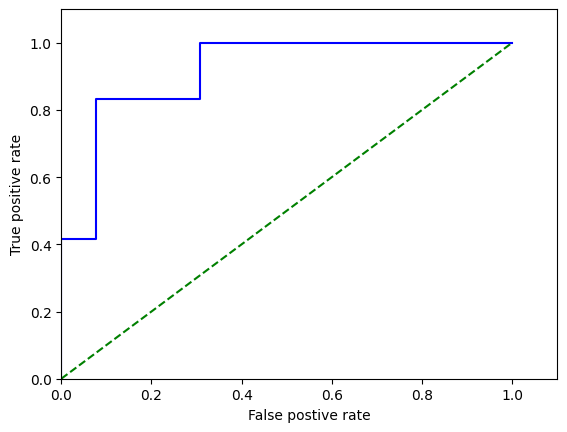

In [41]:
plt.figure()
plt.plot(f1,f2,color="blue",label="ROC Curve")
plt.plot([0,1],[0,1],"g--")
plt.xlim([0,1.1])
plt.ylim([0,1.1])
plt.xlabel("False postive rate")
plt.ylabel("True positive rate")

TEST ROC CURVE

In [39]:
auc1 = roc_auc_score(y_test, y_predict_test)
f3, f4, threshold1 = roc_curve(y_test, y_proba_test[:,1])
roc_auc2 = auc(f3,f4)

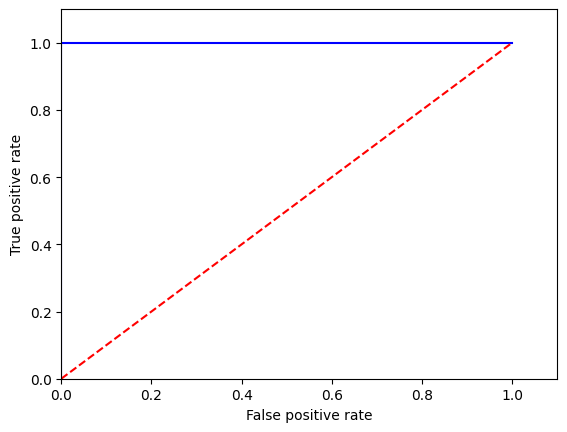

In [47]:
plt.figure()
plt.plot(f3,f4, color="blue")
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1.1])
plt.ylim([0,1.1])
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.show()